In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
h = 0.005
x_0 = 0
x_N = 1
N = int(np.round((x_N - x_0) / h)) + 1

In [53]:
def P2(x):
    return 10 + np.sin(2 * np.pi * x)

def f(x):
    return np.cos(2 * np.pi * x)


In [54]:
def periodic_tridiagonal_solver(h, x_0, x_N, N):
    A = np.zeros((N, N))
    b = np.zeros(N)

    for i in range(N):
        A[i][(i + 1) % N] = 1 / h**2
        A[i][(i + 0) % N] = -2 / h**2 - P2(i * h)
        A[i][(i - 1) % N] = 1 / h**2

        b[i] = f(i * h)

    # Прямой ход
    for i in range(1, N):
        b[i] -= b[i - 1] * A[i][i - 1] / A[i - 1][i - 1]
        A[i] -= A[i - 1] * A[i][i - 1] / A[i - 1][i - 1]

    for i in range(0, N - 1):
        b[N - 1] -= b[i] * A[N - 1][i] / A[i][i]
        A[N - 1] -= A[i] * A[N - 1][i] / A[i][i]

    for i in range(0, N - 1):
        b[i] -= b[N - 1] * A[i][N - 1] / A[N - 1][N - 1]
        A[i] -= A[N - 1] * A[i][N - 1] / A[N - 1][N - 1]

    # Обратный ход
    for i in range(N - 2, -1, -1):
        b[i] -= b[i + 1] * A[i][i + 1] / A[i + 1][i + 1]
        A[i] -= A[i + 1] * A[i][i + 1] / A[i + 1][i + 1]

    for i in range(N):
        b[i] /= A[i][i]

    return np.linspace(x_0, x_N, N), b

In [55]:
x_values, y_values = periodic_tridiagonal_solver(h, x_0, x_N, N)

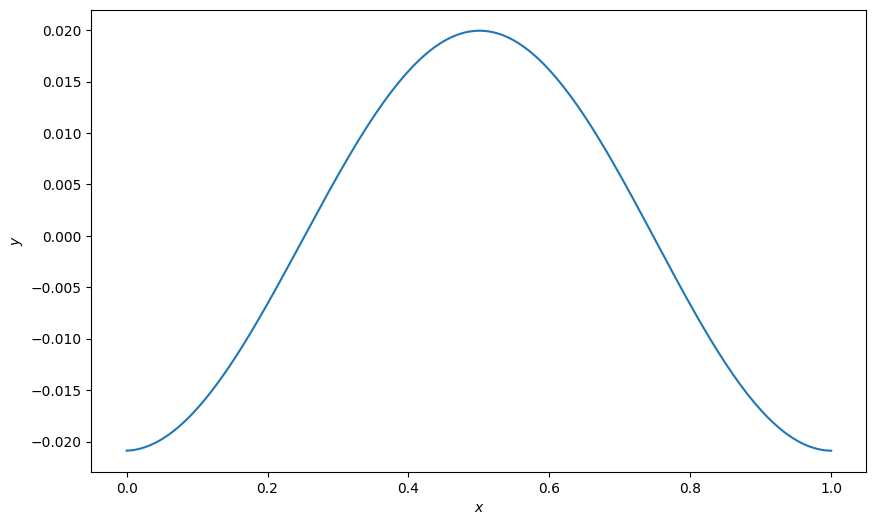

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()